#### Types

Linear Regression   
Multi Linear Regression

##### Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols #--ordinary least squares
from statsmodels.stats.anova import anova_lm #--linear model
from bioinfokit.analys import stat #--This is for Tukey HSD
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
import pandas as pd

data = {
    'speed': [4,4,7,7,8,9,10,10,10,11,11,12,12,12,12,13,13,13,13,14,14,14,14,15,15,15,
              16,16,17,17,17,18,18,18,18,19,19,19,20,20,20,20,20,22,23,24,24,24,24,25],
    'dist':  [2,10,4,22,16,10,18,26,34,17,28,14,20,24,28,26,34,34,46,26,36,60,80,20,26,
              54,32,40,32,40,50,42,56,76,84,36,46,68,32,48,52,56,64,66,54,70,92,93,120,85]
}

df = pd.DataFrame(data)
df.head()


##### Method1:

In [ ]:
f = 'dist~speed'
lm = smf.ols(formula=f, data=df).fit()
pred_method1 = lm.predict(df)

In [ ]:
lm.params

In [ ]:
lm.summary()

In [ ]:
pred_method1

In [ ]:
plt.scatter(df.speed, df.dist)
plt.plot(df.speed, pred_method1, "--",color='r')

##### Method2:`

In [ ]:
x = df.speed
y = df.dist

x2 = sm.add_constant(x)
m=sm.OLS(y,x2).fit()
pred_model2 = m.predict(x2)

In [ ]:
m.summary()

In [ ]:
pred_model2

In [ ]:
plt.scatter(df.speed, df.dist)
plt.plot(df.speed, pred_model2, "--",color='r')

In [ ]:
plt.scatter(df.speed, df.dist)
plt.plot(df.speed, pred_method1, "--",color='r')

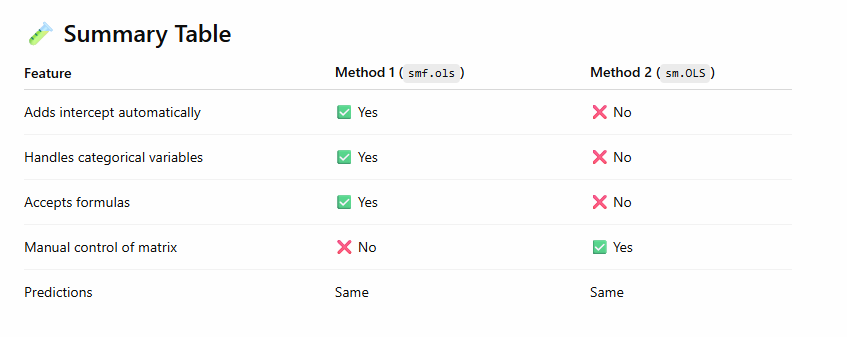

#### Diamond Price prediction

In [32]:
df = pd.read_csv(r"Z_91_DS_LINEAR_REGRESSION_Diamonds.csv")
df.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


In [41]:
f = 'price~carat'
m = smf.ols(f, data=df).fit()
m.params

Intercept   -2256.360580
carat        7756.425618
dtype: float64

In [42]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Wed, 19 Nov 2025   Prob (F-statistic):               0.00
Time:                        19:27:47   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2256.3606     13.055   -172.830      0.000   -2281.949   -2230.772
carat       7756.4256     14.067    551.408      0.000    7728.855    7783.996
==============================================================================
Omnibus:                    14025.341   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153030.525
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.035   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
df1 = pd.DataFrame(columns=['carat','price'])
df1['carat'] = df['carat']
df1.head()

,carat,price
0,0.23,NaN
1,0.21,NaN
2,0.23,NaN
3,0.29,NaN
4,0.31,NaN


In [44]:
pred_model1 = m.predict(df1)

<Axes: xlabel='carat', ylabel='price'>

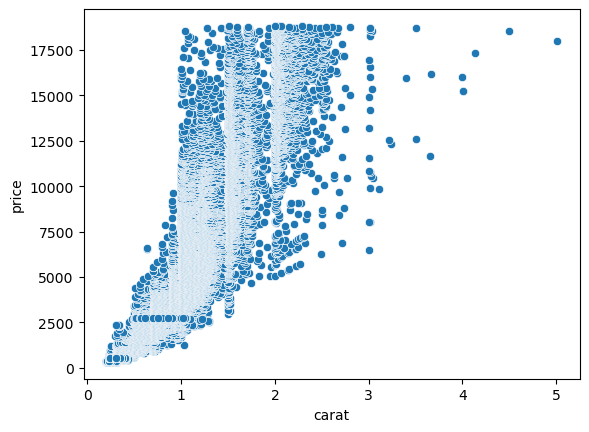

In [46]:
sns.scatterplot(x=df.carat, y=df.price)

<Axes: xlabel='carat'>

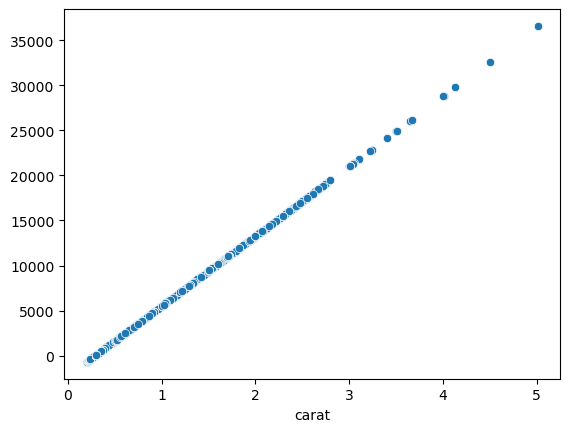

In [47]:
sns.scatterplot(x=df1.carat, y=pred_model1)

### MultiLinear Regression

In [48]:
df

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,2757,6.15,6.12,3.74


In [50]:
f = 'price ~ carat + cut + color + clarity'
lm = smf.ols(formula = f, data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 3.264e+04
Date:                Wed, 19 Nov 2025   Prob (F-statistic):               0.00
Time:                        19:32:14   Log-Likelihood:            -4.5699e+05
No. Observations:               53940   AIC:                         9.140e+05
Df Residuals:                   53921   BIC:                         9.142e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -7362.8022     51.684   -142.458      0.000   -7464.103   -7261.501
cut[T.Good]        655.7674     33.634     19.497      0.000     589.844     721.690
cut[T.Ideal]       998.2544     30.656     32.563      0.000     938.168    1058.341
cut[T.Premium]     869.3959     30.931     28.108      0.000     808.771     930.021
cut[T.Very Good]   848.7169     31.277     27.135      0.000     787.414     910.020
color[T.E]        -211.6825     18.316    -11.557      0.000    -247.582    -175.783
color[T.F]        -303.3100     18.509    -16.387      0.000    -339.589    -267.031
color[T.G]        -506.1995     18.122    -27.933      0.000    -541.719    -470.680
color[T.H]        -978.6977     19.272    -50.784      0.000   -1016.471    -940.925
color[T.I]       -1440.3019     21.646    -66.538      0.000   -1482.729   -1397.875
color[T.J]       -2325.2224     26.723    -87.013      0.000   -2377.599   -2272.846
clarity[T.IF]     5419.6468     52.136    103.952      0.000    5317.460    5521.834
clarity[T.SI1]    3573.6880     44.598     80.132      0.000    3486.276    3661.100
clarity[T.SI2]    2625.9500     44.788     58.630      0.000    2538.164    2713.736
clarity[T.VS1]    4534.8790     45.535     99.591      0.000    4445.630    4624.128
clarity[T.VS2]    4217.8291     44.841     94.061      0.000    4129.940    4305.719
clarity[T.VVS1]   5072.0276     48.211    105.205      0.000    4977.534    5166.521
clarity[T.VVS2]   4967.1994     46.891    105.932      0.000    4875.293    5059.105
carat             8886.1289     12.034    738.437      0.000    8862.543    8909.715
==============================================================================
Omnibus:                    15285.474   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           183262.957
Skew:                           1.022   Prob(JB):                         0.00
Kurtosis:                      11.796   Cond. No.                         37.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### How do I understand this?

You’re looking at regression output with categorical variables (dummy variables).
Let me break it down in a clean and intuitive way.

✅ 1. First, understand the model structure

You likely fitted something like:

price ~ cut + color


Since cut and color are categorical, statsmodels automatically creates dummy variables.

✅ 2. What is the baseline (reference) category?

For each categorical variable, one level is dropped (to avoid multicollinearity). That dropped category becomes the reference level.

From your output:
For cut

You see estimates for:

Good

Ideal

Premium

Very Good

👉 That means the reference category is: Fair

For color

You see:

E

F

👉 That means reference color is: D

So all coefficients are relative to these reference categories.

✅ 3. Interpretation of coefficients
Intercept = –7362.8022

This is the predicted price for a diamond with:

cut = Fair

color = D

all numeric variables = 0 (if any)

But since a diamond with zero carat doesn’t make sense, the intercept is not meaningful alone.
It becomes meaningful only when combined with dummy adjustments.

✔️ Understanding each dummy coefficient

These show how much the price changes compared to the reference category.

🔶 CUT coefficients (compared to Fair)
Cut level	Coefficient	Meaning
Good	+655.76	Good cut diamonds cost ₹655 more than Fair cuts, holding all else constant
Ideal	+998.25	Ideal cuts cost ₹998 more than Fair cuts
Premium	+869.39	Premium cuts cost ₹869 more than Fair cuts
Very Good	+848.71	Very Good cuts cost ₹848 more than Fair cuts

👉 All cuts above Fair increase price.

🔶 COLOR coefficients (compared to D)
Color	Coefficient	Meaning
E	–211.68	E-colored diamonds cost ₹212 less than D
F	–303.31	F-colored diamonds cost ₹303 less than D

👉 So surprisingly, E and F are priced lower than D in this dataset.

🔥 How to read the p-values?

All p-values = 0.000 (highly significant)
Meaning every variable strongly affects price.

🔢 Example: Price of a diamond with Ideal cut & E color

Formula:

price = Intercept 
        + cut coefficient 
        + color coefficient 
        + (other variables…)


Plug in:

= -7362.8 
  + 998.25     (Ideal cut)
  - 211.68     (E color)


→ gives the baseline adjusted price (before adding carat, depth, etc.).

💡 Summary (easy explanation)

The model compares each category to a reference category.

Positive coefficient → costs more than the reference.

Negative coefficient → costs less than the reference.

All variables are statistically significant.

The intercept is the baseline when all dummy levels are at the reference.

####   But when the p value is less than 0.05 then it is following the region of rejection

You are correct conceptually, but let me refine the statement so you understand it perfectly.

✅ Correct Interpretation

In hypothesis testing:

If p-value < α (usually 0.05)

→ Reject the null hypothesis (H₀)
→ This means the test statistic falls in the rejection region.

So your statement:

“when the p value is less than 0.05 then it is following the region of rejection”

is correct, but the more precise explanation is:

📌 Better English & Correct Statistical Meaning

If the p-value is less than the significance level (α = 0.05),
the test statistic is far enough from the null hypothesis distribution
that we reject the null hypothesis.
This corresponds to the rejection region of the test.

🔍 Why does p-value < 0.05 mean “rejection region”?

Because:

p-value = probability of observing the sample result (or more extreme) if H₀ is true

If that probability is very small (below 0.05),
it means the observed data is too unlikely under H₀.

Thus the sample point must lie in the tail area (rejection region).

🧠 Simple Example

Suppose H₀: mean = 50
α = 0.05

You compute a test statistic, say z = 2.1
This is far from zero, so it lies in the tail → rejection region.
The p-value is around 0.035 < 0.05 → reject H₀.

####   So here for each category or a column Has an associated P value What do I understand from it

Great question — this is one of the most important parts of interpreting a regression output that includes categorical variables.

Let’s break it down very clearly.

✅ When you include a categorical column (like cut, color, clarity) in a regression…

Statsmodels creates dummy variables.
Each level of the category gets:

a coefficient

a standard error

a t-value

a p-value

🎯 What does the p-value of each category tell you?

It answers this question:

Is this category significantly different from the base (reference) category?

For example, in your results:

cut[T.Good]       p = 0.000
cut[T.Ideal]      p = 0.000
cut[T.Premium]    p = 0.000
cut[T.Very Good]  p = 0.000

🔍 Meaning:

These categories (Good, Ideal, Premium, Very Good) have mean prices significantly different from the reference level (which is "Fair", because Fair is missing from the list = baseline).

Since p < 0.05 for all of them:

→ All cuts differ significantly from FAIR cut
→ The difference is not due to random chance.

📌 General Interpretation Rule
If p-value < 0.05

→ That category has a statistically significant effect on the dependent variable
→ It differs from the reference category

If p-value > 0.05

→ That category does NOT significantly differ from the reference category
→ Adding it doesn’t explain much variation

🧠 Example With Your Output
You have:
color[T.E]   p = 0.000  
color[T.F]   p = 0.000


The reference color is probably D (since it is missing).

Interpretation:

Diamonds with color E are significantly cheaper than color D (negative coefficient)

Diamonds with color F are also significantly cheaper than D

Since p < 0.05, these differences are statistically real.

💡 Think of it this way

For each category:

Coefficient → how much it differs from the baseline

p-value → whether that difference is meaningful

Example:

cut[T.Good] = 655.76 (p = 0.000)


Meaning:

Good diamonds are 655 USD more expensive than Fair diamonds

And the p-value says this difference is statistically significant

📝 Summary

For each category column:

You are not testing the category “in general”

You are testing each level vs the baseline level

p-value tells you whether the difference is significant